In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from analysis import *
from ema_workbench import load_results

In [3]:
# TODO: Do not forget to aggregate across replications or select a single one

In [4]:
# Load results
results = load_results('../results/results_2000.tar.gz')
experiments = results[0]

In [5]:
# Select district
district = 'Castries'

In [6]:
# Prepare outcomes for a single district
outcomes = prepare_outcomes_dict(results, district, add_scenario_column=True, add_policy_column=True)
outcomes = pd.DataFrame(outcomes)

# Select outcomes of interest
outcomes_of_interest = ['n_new_poor',
                        'new_poverty_gap',
                        'annual_average_consumption_loss',
                        'annual_average_consumption_loss_pct',
                        'r']
df = pd.merge(experiments, outcomes, on=['scenario', 'policy'])

## EDA

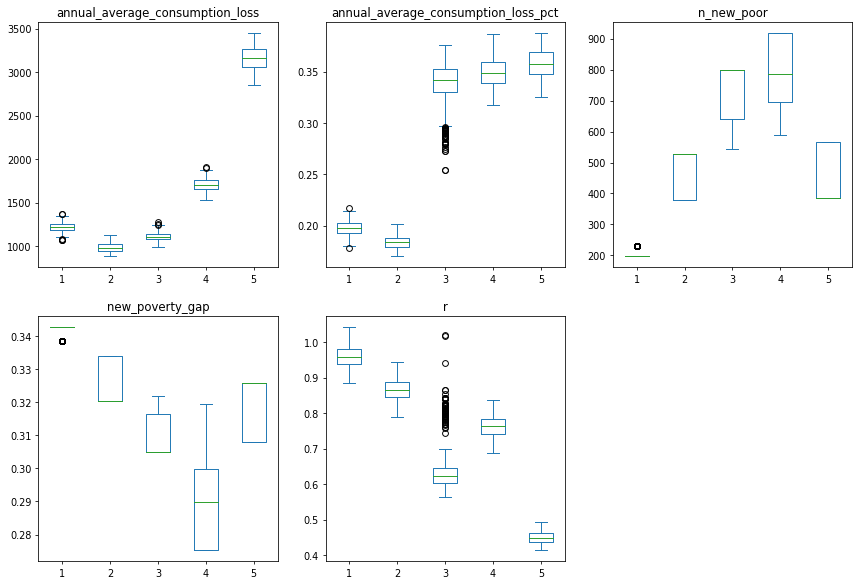

In [7]:
df[outcomes_of_interest + ['random_seed']].plot.box(subplots=True, layout=(2, 3), figsize=(15, 10), showfliers=True, by='random_seed');

In [8]:
# data = df[df['random_seed'] == 1]

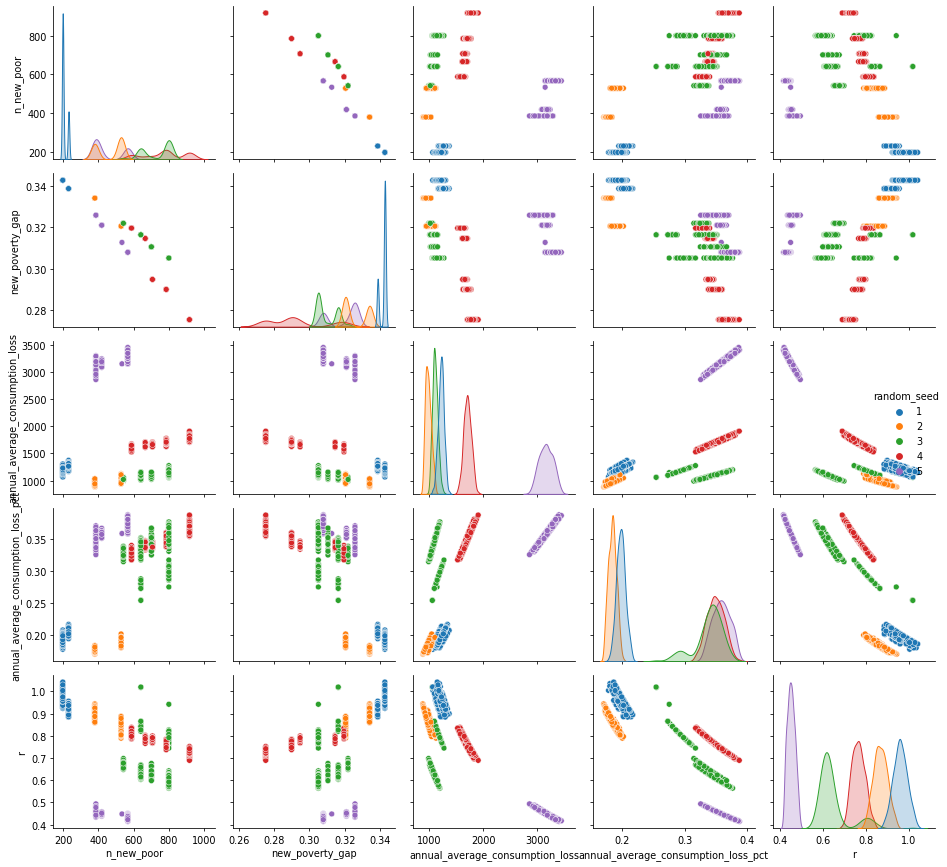

In [9]:
sns.pairplot(df, hue='random_seed', vars=outcomes_of_interest, palette='tab10', diag_kind='kde')
plt.tight_layout()

In [10]:
df = pd.merge(experiments, outcomes, on=['scenario', 'policy'])

In [11]:
uncertainties_of_interest = ['consumption_utility',
                             'discount_rate',
                             'income_and_expenditure_growth',
                             'poverty_bias']

In [12]:
df['random_seed'].unique()

array([1, 5, 3, 2, 4], dtype=int64)

In [13]:
random_seed = 2

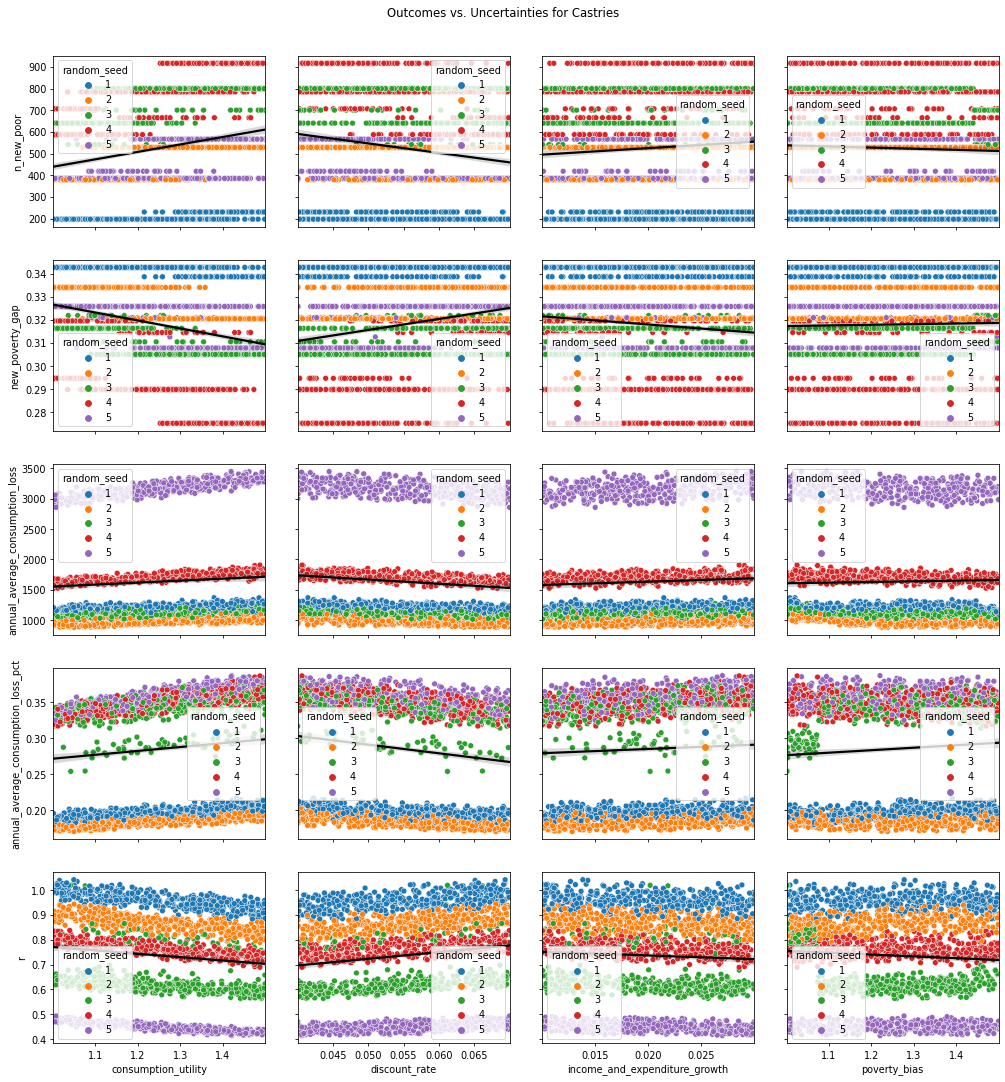

In [16]:
nrows = len(outcomes_of_interest)
ncols = len(uncertainties_of_interest)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows * 3, ncols * 4), sharey='row', sharex='col')

# data = df[df['random_seed'] == random_seed]
for uncertainty in uncertainties_of_interest:
    for outcome in outcomes_of_interest:
        # Make scatterplot
        sns.scatterplot(data=df,
                        x=uncertainty, 
                        y=outcome, 
                        hue='random_seed',
                        palette='tab10',
                        ax=ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)])
        # Add trend line
        sns.regplot(data=df,
                    x=uncertainty, 
                    y=outcome, 
                    ax=ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)],
                    scatter=False,
                    color='black')
        ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)].set_xlabel(uncertainty)
        ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)].set_ylabel(outcome)
fig.suptitle(f'Uncertainties vs. Outcomes for {district}')
fig.tight_layout(pad=3.0)

In [17]:
df = df[df['random_seed'] == 1]

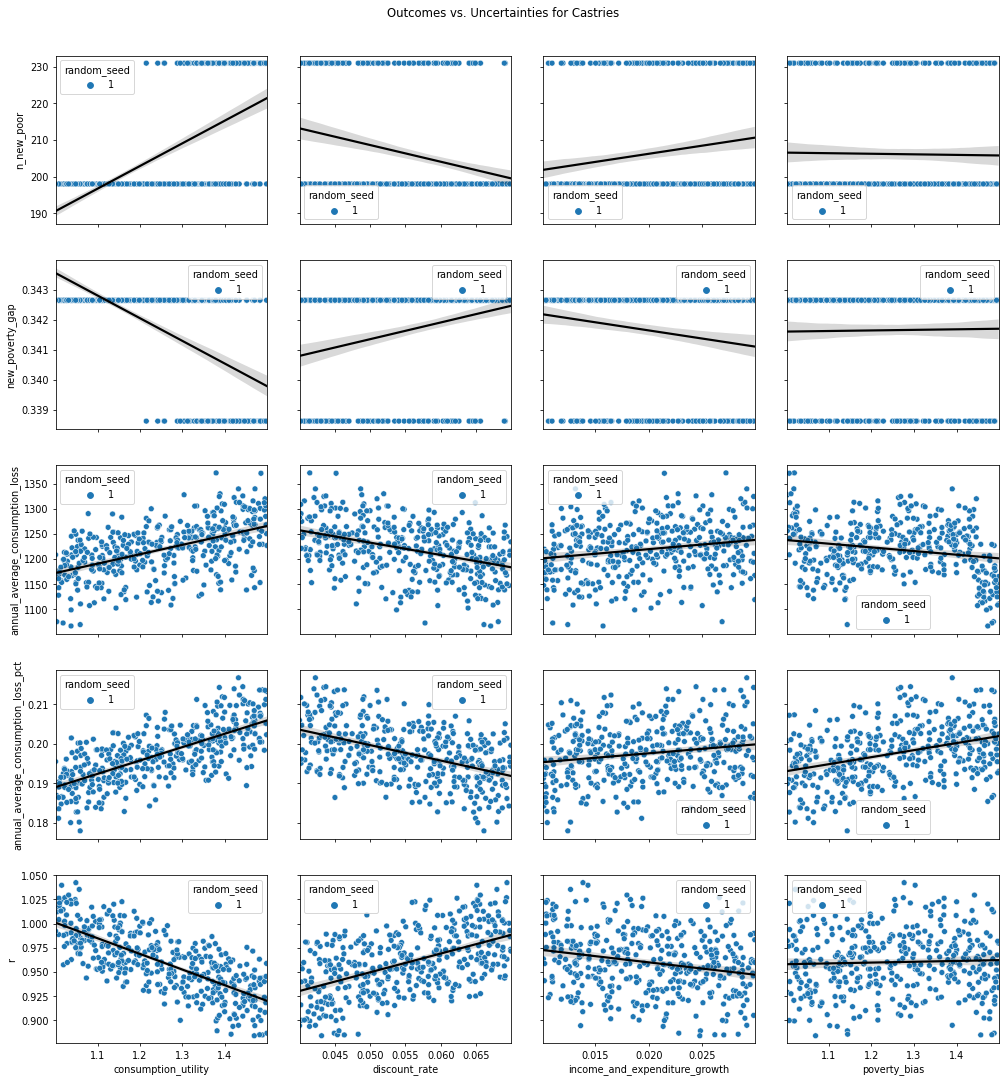

In [18]:
nrows = len(outcomes_of_interest)
ncols = len(uncertainties_of_interest)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows * 3, ncols * 4), sharey='row', sharex='col')

# data = df[df['random_seed'] == random_seed]
for uncertainty in uncertainties_of_interest:
    for outcome in outcomes_of_interest:
        # Make scatterplot
        sns.scatterplot(data=df,
                        x=uncertainty, 
                        y=outcome, 
                        hue='random_seed',
                        palette='tab10',
                        ax=ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)])
        # Add trend line
        sns.regplot(data=df,
                    x=uncertainty, 
                    y=outcome, 
                    ax=ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)],
                    scatter=False,
                    color='black')
        ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)].set_xlabel(uncertainty)
        ax[outcomes_of_interest.index(outcome), uncertainties_of_interest.index(uncertainty)].set_ylabel(outcome)
fig.suptitle(f'Uncertainties vs. Outcomes for {district}')
fig.tight_layout(pad=3.0)

## Feature scoring

In [34]:
uncertainties_of_interest = ['consumption_utility',
                             'discount_rate',
                             'income_and_expenditure_growth',
                             'poverty_bias']

outcomes_of_interest = ['n_new_poor',
                        'new_poverty_gap',
                        'annual_average_consumption_loss',
                        'annual_average_consumption_loss_pct',
                        'r']

In [35]:
from ema_workbench.analysis import feature_scoring

experiments = results[0]
outcomes = prepare_outcomes_dict(results, district, add_scenario_column=True, add_policy_column=True)
outcomes = pd.DataFrame(outcomes)

df = pd.merge(experiments, outcomes, on=['scenario', 'policy'])
data = df[df['random_seed'] == 1]
x = data[uncertainties_of_interest + ['scenario', 'policy', 'model']]
y = data[outcomes_of_interest].to_dict('list')

fs = feature_scoring.get_feature_scores_all(x, y)

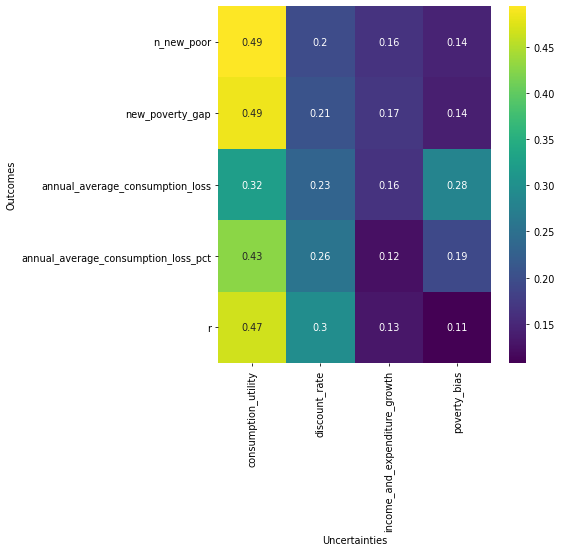

In [40]:
plt.figure(figsize=(8, 8))
sns.heatmap(fs.T, cmap="viridis", annot=True)
plt.tight_layout()
# Remove y label
plt.ylabel('Outcomes')
plt.xlabel('Uncertainties');